In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Spiral parameters
num_points = 500
theta = np.linspace(0, 8 * np.pi, num_points)
z = np.linspace(0, 5, num_points)
r = 0.1 * theta  # radius grows with angle

# Simulate 50 ms delay by skipping initial segment
delay_ms = 50
time_per_step_ms = 1  # 1 ms per step
delay_steps = int(delay_ms / time_per_step_ms)

# Spiral A (after delay)
x1 = r[delay_steps:] * np.cos(theta)[delay_steps:]
y1 = r[delay_steps] * np.sin(theta)[delay_steps:]
z1 = z[delay_steps:]


In [ ]:
# Time vector (in seconds)
t = np.linspace(0, (len(x1) - 1) * time_per_step_ms / 1000, len(x1))

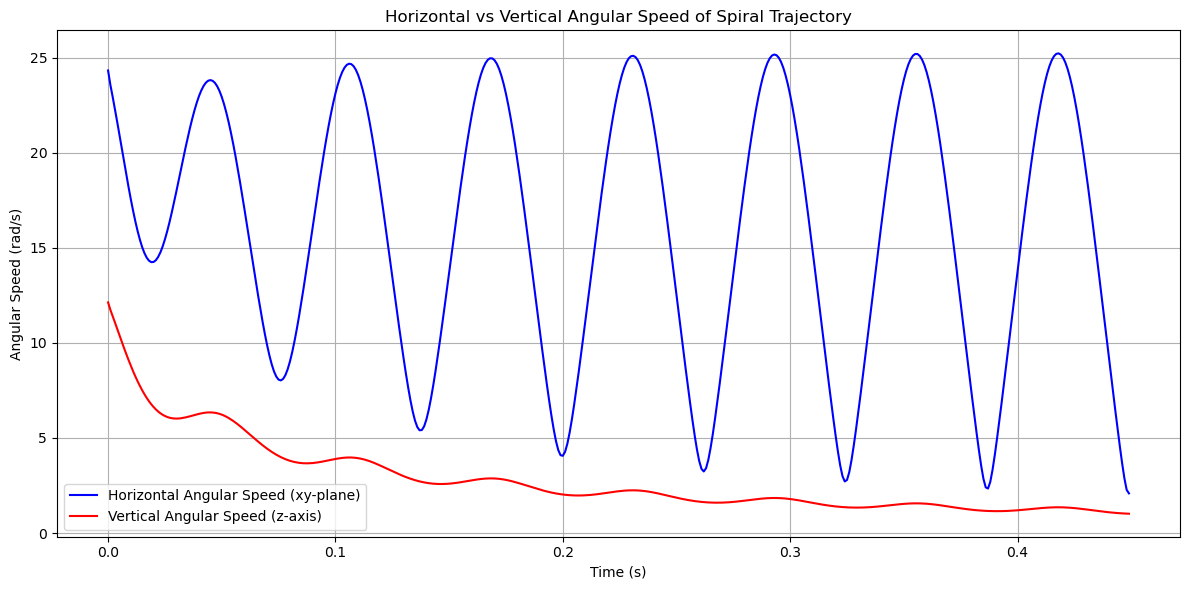

In [2]:
def linearAngularSpeeds(x, y, z, t):
    
    # Velocity components
    dxdt = np.gradient(x, t)
    dydt = np.gradient(y, t)
    dzdt = np.gradient(z, t)

    # Position and velocity vectors
    r_vec = np.vstack((x, y, z))
    v_vec = np.vstack((dxdt, dydt, dzdt))
    
    # Compute linear velocity components
    v_horizontal = np.sqrt(dxdt**2 + dydt**2)
    v_vertical = np.abs(dzdt)
    
    # Angular velocity vector
    r_cross_v = np.cross(r_vec.T, v_vec.T)
    r_mag_squared = np.sum(r_vec**2, axis=0)
    angular_velocity_vector = (r_cross_v.T / r_mag_squared).T

    # Components
    omega_x = angular_velocity_vector[:, 0]
    omega_y = angular_velocity_vector[:, 1]
    omega_z = angular_velocity_vector[:, 2]

    # Horizontal and vertical angular speed
    horizontal_omega = np.sqrt(omega_x**2 + omega_y**2)
    vertical_omega = np.abs(omega_z)
    
    return(v_horizontal, v_vertical, horizontal_omega, vertical_omega)

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, horizontal_omega, label='Horizontal Angular Speed (xy-plane)', color='blue')
plt.plot(t, vertical_omega, label='Vertical Angular Speed (z-axis)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Angular Speed (rad/s)')
plt.title('Horizontal vs Vertical Angular Speed of Spiral Trajectory')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()